<a href="https://colab.research.google.com/github/HendrikPrayoga/KNN-klasification/blob/main/Valorant_Insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MENAMPILKAN DATA**

In [ ]:
# Pasang pustaka yang diperlukan
!pip install pandas openpyxl

# Import pustaka yang diperlukan
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from IPython.core.display import HTML
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Unggah file
uploaded = files.upload()

# Ambil nama file yang diunggah
file_path = list(uploaded.keys())[0]

# Baca file CSV
df = pd.read_csv(file_path)


# Mengatur tampilan pandas untuk menampilkan lebih banyak kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Menampilkan 1000 baris pertama dalam format HTML yang lebih rapi
print("\nMenampilkan 1000 baris pertama:")
display(HTML(df.head(1000).to_html()))


Saving valorant_games.csv to valorant_games.csv

Menampilkan 1000 baris pertama:


# **DATA UNDERSTANDING**

In [ ]:
print("data shape : ", df.shape)

data shape :  (1000, 19)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        1000 non-null   int64  
 1   episode        1000 non-null   int64  
 2   act            1000 non-null   int64  
 3   rank           1000 non-null   object 
 4   date           1000 non-null   object 
 5   agent          1000 non-null   object 
 6   map            1000 non-null   object 
 7   outcome        1000 non-null   object 
 8   round_wins     1000 non-null   int64  
 9   round_losses   1000 non-null   int64  
 10  kills          1000 non-null   int64  
 11  deaths         1000 non-null   int64  
 12  assists        1000 non-null   int64  
 13  kdr            1000 non-null   float64
 14  avg_dmg_delta  1000 non-null   int64  
 15  headshot_pct   1000 non-null   int64  
 16  avg_dmg        1000 non-null   int64  
 17  acs            1000 non-null   int64  
 18  num_frag 

In [ ]:
df.describe()

game_id      episode          act   round_wins  round_losses  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.00000   
mean    500.500000     7.500000     2.066000    10.589000      10.52700   
std     288.819436     1.102368     0.868561     3.359966       3.55273   
min       1.000000     6.000000     1.000000     0.000000       0.00000   
25%     250.750000     7.000000     1.000000     8.000000       8.00000   
50%     500.500000     7.000000     2.000000    13.000000      13.00000   
75%     750.250000     9.000000     3.000000    13.000000      13.00000   
max    1000.000000     9.000000     3.000000    18.000000      20.00000   

             kills       deaths      assists          kdr  avg_dmg_delta  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.000000   
mean     15.299000    14.249000     4.656000     1.178400      10.308000   
std       5.253113     3.724362     2.656072     0.656784      43.383791   
min       1.000000     0.000000     0.000000     0.200000    -124.000000   
25%      12.000000    13.000000     3.000000     0.800000     -20.000000   
50%      15.000000    15.000000     4.000000     1.100000       9.000000   
75%      19.000000    17.000000     6.000000     1.400000      39.000000   
max      35.000000    26.000000    20.000000     9.700000     293.000000   

       headshot_pct      avg_dmg          acs     num_frag  
count   1000.000000  1000.000000  1000.000000  1000.000000  
mean      22.763000   134.446000   205.382000     2.990000  
std        9.919033    35.199916    56.539958     1.368127  
min        2.000000    42.000000    59.000000     1.000000  
25%       15.000000   110.000000   166.000000     2.000000  
50%       22.000000   133.000000   203.000000     3.000000  
75%       29.000000   157.000000   240.000000     4.000000  
max       63.000000   373.000000   572.000000     5.000000

In [ ]:
df.outcome.value_counts()

outcome
Loss    497
Win     491
Draw     12
Name: count, dtype: int64

In [ ]:
df.agent.value_counts()

agent
Cypher       719
Killjoy      230
Viper         17
Omen          10
KAY/O          9
Brimstone      5
Breach         3
Vyse           3
Astra          2
Phoenix        1
Fade           1
Name: count, dtype: int64

In [ ]:
df['map'].value_counts()

map
Ascent      160
Lotus       143
Bind        142
Haven       119
Split        98
Sunset       86
Icebox       62
Pearl        60
Fracture     53
Breeze       44
Abyss        33
Name: count, dtype: int64

<Axes: xlabel='outcome', ylabel='Count'>

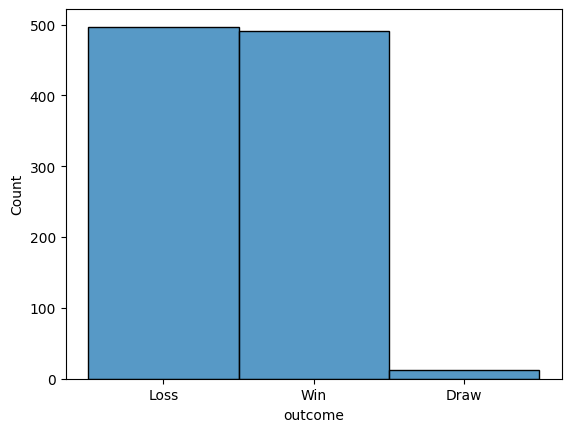

In [ ]:
sns.histplot(df['outcome'])

# **CLEANING DATA**

In [ ]:
df.isnull().sum()

game_id          0
episode          0
act              0
rank             0
date             0
agent            0
map              0
outcome          0
round_wins       0
round_losses     0
kills            0
deaths           0
assists          0
kdr              0
avg_dmg_delta    0
headshot_pct     0
avg_dmg          0
acs              0
num_frag         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

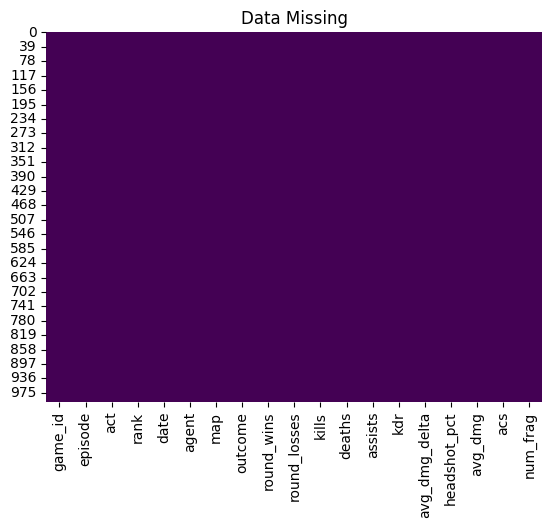

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Data Missing')
plt.show()


# **Exploratory Data Analysis (EDA)**

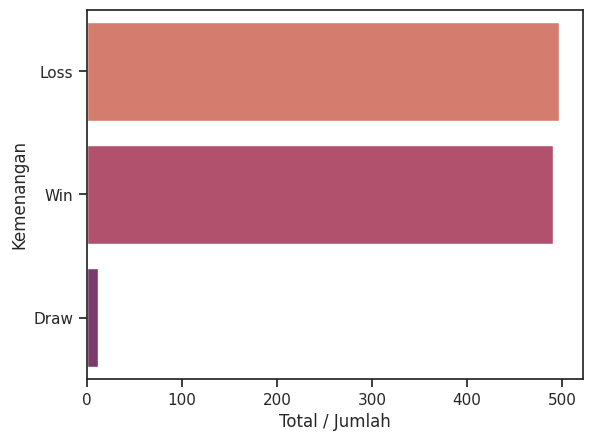

In [ ]:
sns.set_theme(style='ticks')
sns.countplot(y='outcome', data=df, hue='outcome', palette='flare')
plt.ylabel("Kemenangan")
plt.xlabel('Total / Jumlah')
plt.show()

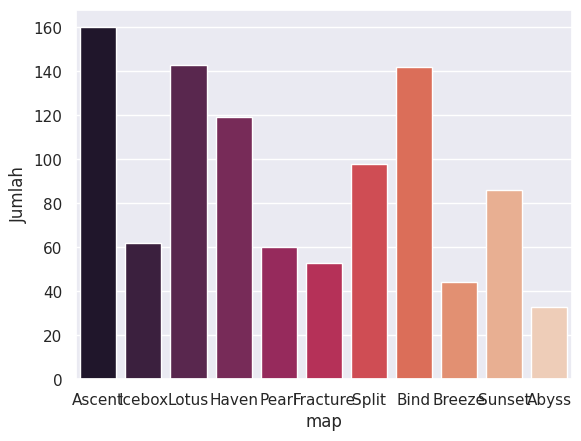

In [ ]:
sns.set_theme(style='darkgrid')
sns.countplot(x='map', data=df, hue='map', palette='rocket')
plt.ylabel("Jumlah")
plt.xlabel('map')
plt.show()


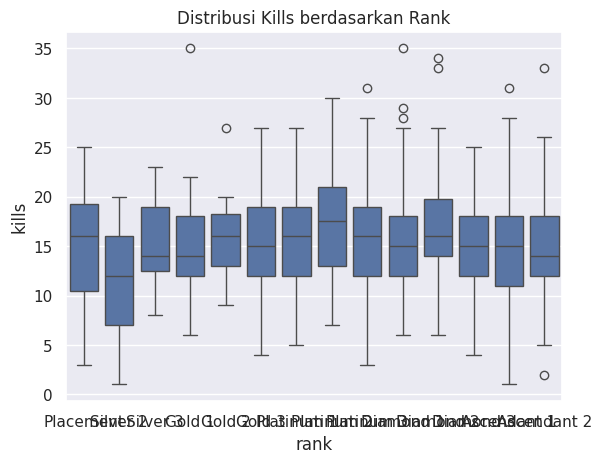

In [ ]:
sns.boxplot(x='rank', y='kills', data=df)
plt.title('Distribusi Kills berdasarkan Rank')
plt.show()

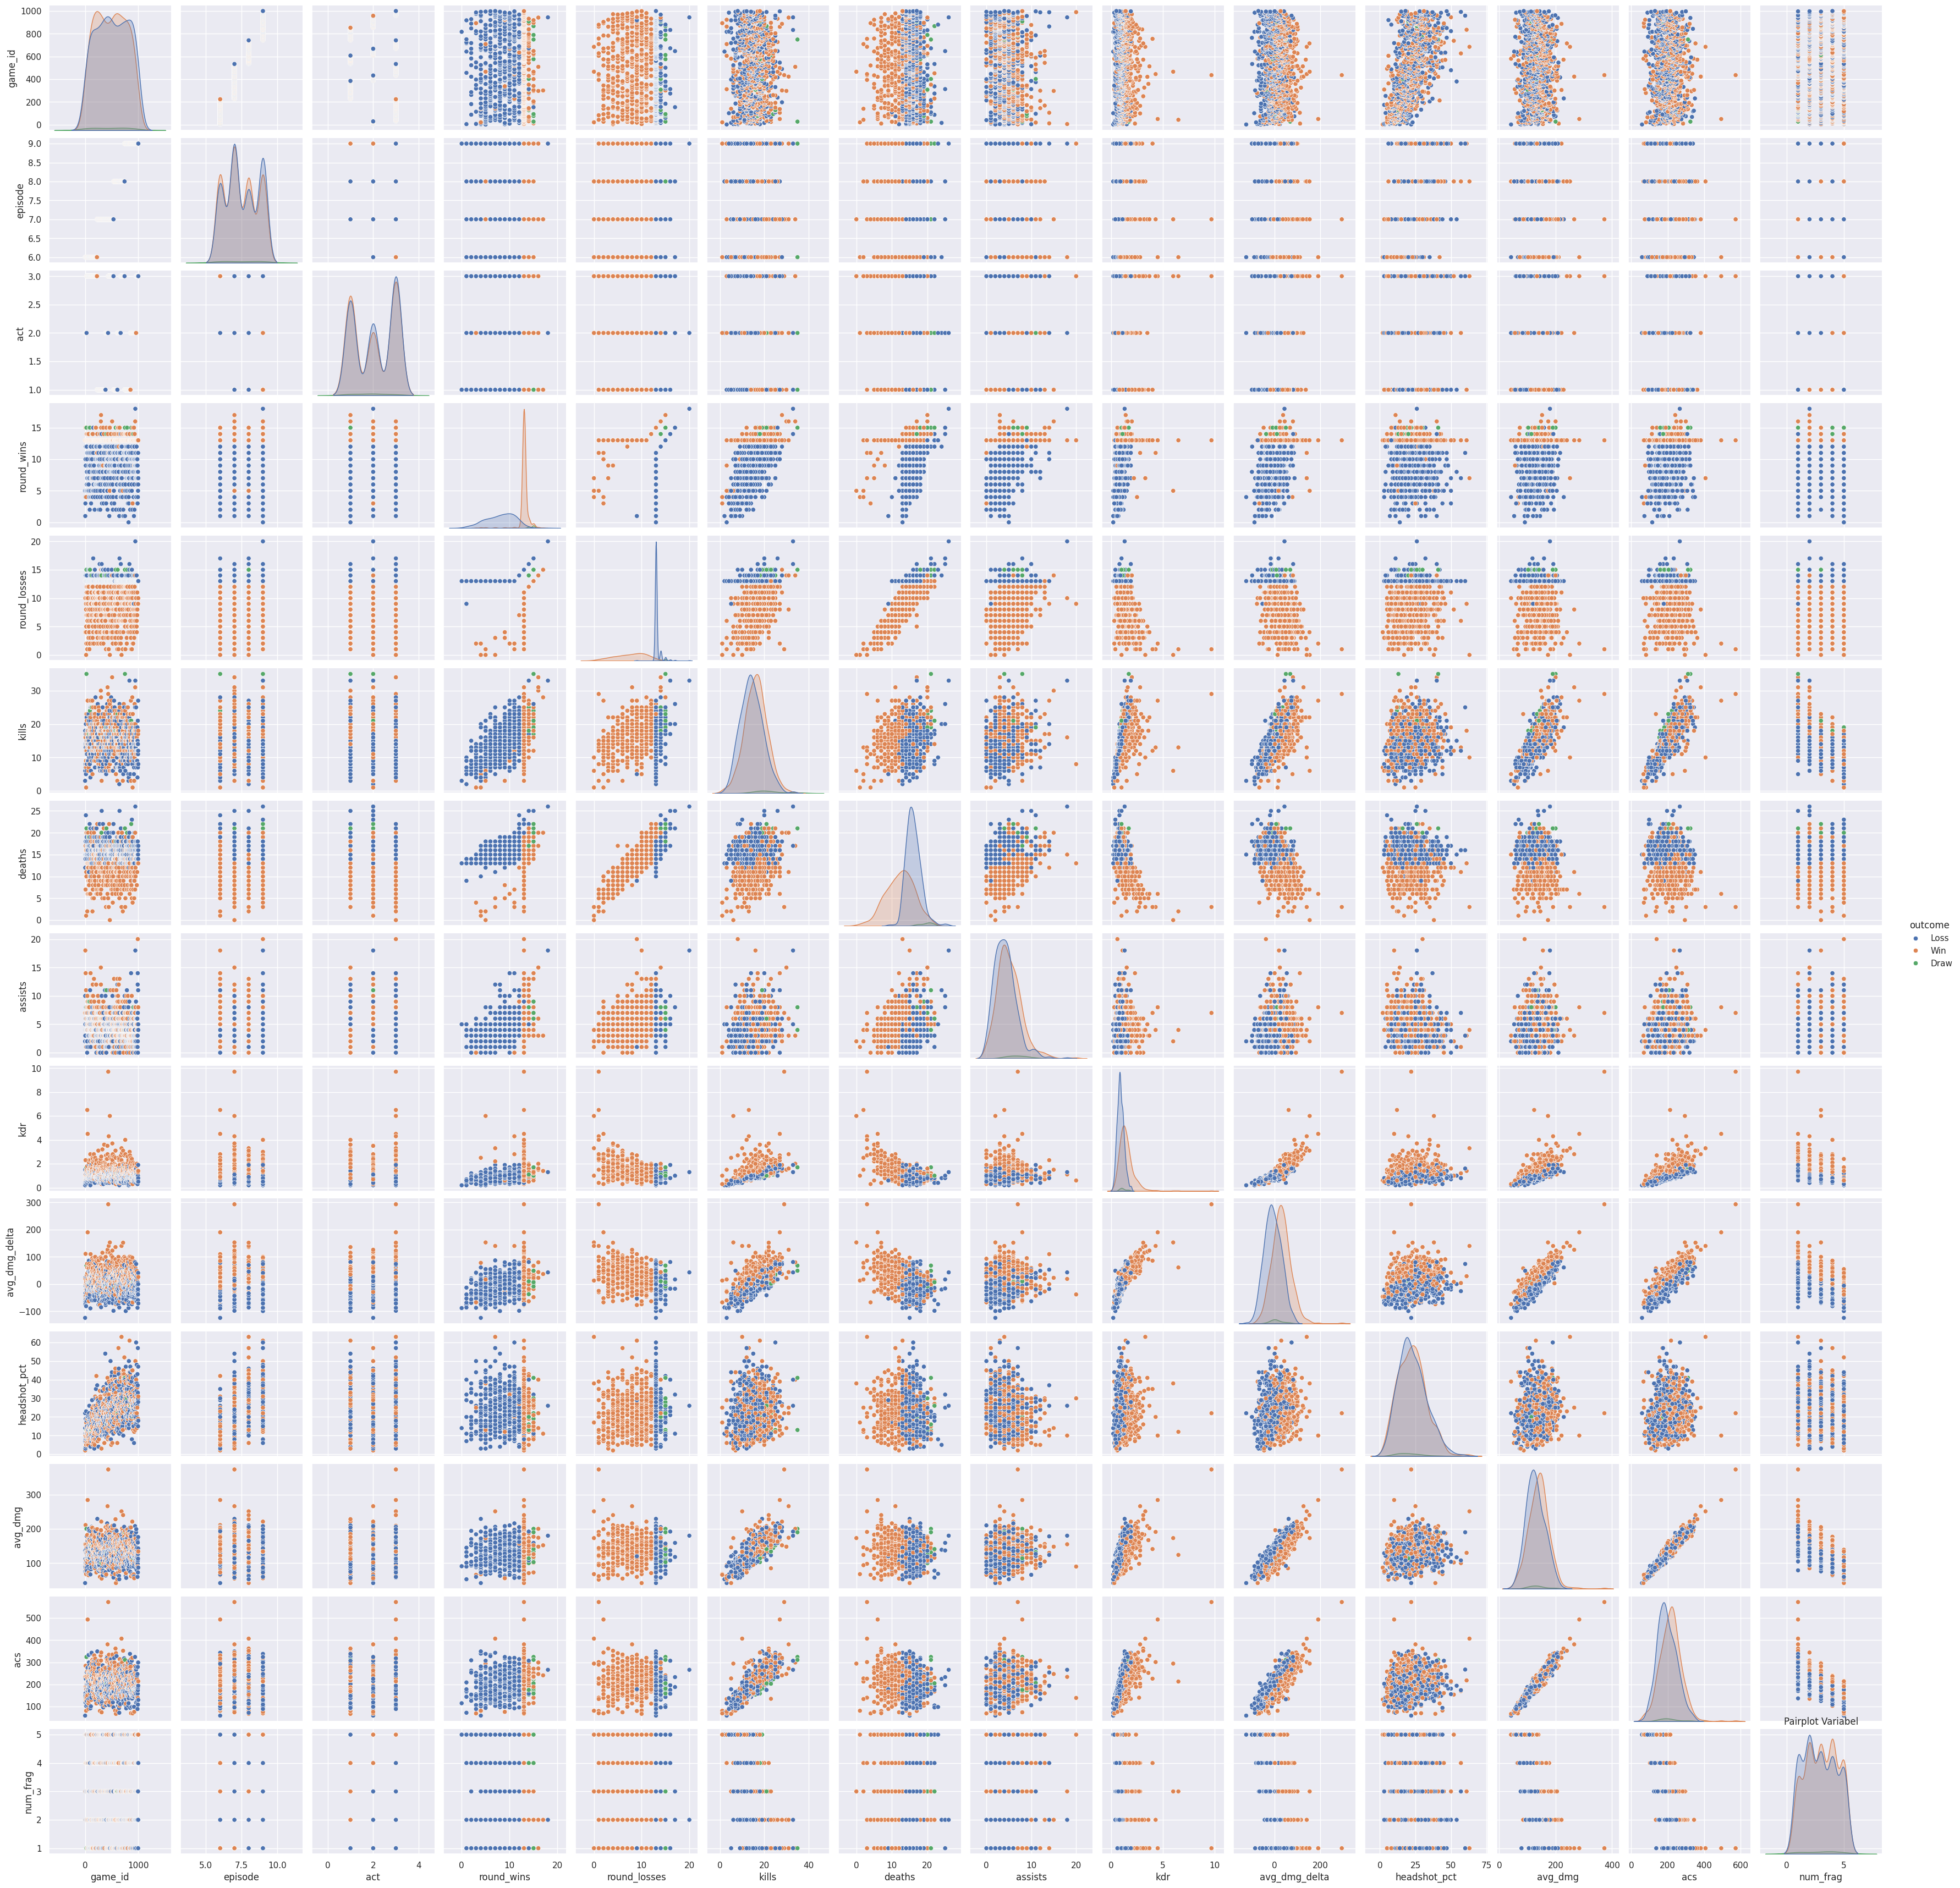

In [ ]:
sns.pairplot(df, hue='outcome')
plt.title('Pairplot Variabel')
plt.show()


# **Data Preparation**

In [ ]:
df.head()

game_id  episode  act       rank       date      agent     map outcome  \
0        1        6    2  Placement  4/11/2023     Cypher  Ascent    Loss   
1        2        6    2  Placement  4/12/2023     Cypher  Icebox    Loss   
2        3        6    2  Placement  4/15/2023      KAY/O   Lotus     Win   
3        4        6    2  Placement  4/15/2023  Brimstone  Ascent    Loss   
4        5        6    2  Placement  4/15/2023     Cypher   Haven    Loss   

   round_wins  round_losses  kills  deaths  assists  kdr  avg_dmg_delta  \
0           5            13      8      15        4  0.5            -61   
1           4            13      3      15        2  0.2           -124   
2          13             4      7      12        7  0.6            -46   
3           9            13     18      12       10  1.5             23   
4           1            13      6      14        3  0.4            -75   

   headshot_pct  avg_dmg  acs  num_frag  
0             3       76  125         3  
1            22       42   59         5  
2             2       87  132         5  
3            14      137  230         2  
4             7       90  146         4

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Dictionary untuk menyimpan hasil mapping encoding
encoding_map = {}

# Encoding dan menyimpan mapping untuk setiap kolom
for col in ['rank', 'agent', 'map', 'outcome']:
    df[col] = label_encoder.fit_transform(df[col])  # Encoding kolom
    encoding_map[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))  # Simpan mapping

# Menampilkan keterangan mapping encoding
print("\nKeterangan Mapping Encoding:")
for col, mapping in encoding_map.items():
    print(f"\nKolom '{col}':")
    for original, encoded in mapping.items():
        print(f"  {original} -> {encoded}")


Keterangan Mapping Encoding:

Kolom 'rank':
  Ascendant 1 -> 0
  Ascendant 2 -> 1
  Diamond 1 -> 2
  Diamond 2 -> 3
  Diamond 3 -> 4
  Gold 1 -> 5
  Gold 2 -> 6
  Gold 3 -> 7
  Placement -> 8
  Platinum 1 -> 9
  Platinum 2 -> 10
  Platinum 3 -> 11
  Silver 2 -> 12
  Silver 3 -> 13

Kolom 'agent':
  Astra -> 0
  Breach -> 1
  Brimstone -> 2
  Cypher -> 3
  Fade -> 4
  KAY/O -> 5
  Killjoy -> 6
  Omen -> 7
  Phoenix -> 8
  Viper -> 9
  Vyse -> 10

Kolom 'map':
  Abyss -> 0
  Ascent -> 1
  Bind -> 2
  Breeze -> 3
  Fracture -> 4
  Haven -> 5
  Icebox -> 6
  Lotus -> 7
  Pearl -> 8
  Split -> 9
  Sunset -> 10

Kolom 'outcome':
  Draw -> 0
  Loss -> 1
  Win -> 2


In [ ]:
df.head()

game_id  episode  act  rank       date  agent  map  outcome  round_wins  \
0        1        6    2     8  4/11/2023      3    1        1           5   
1        2        6    2     8  4/12/2023      3    6        1           4   
2        3        6    2     8  4/15/2023      5    7        2          13   
3        4        6    2     8  4/15/2023      2    1        1           9   
4        5        6    2     8  4/15/2023      3    5        1           1   

   round_losses  kills  deaths  assists  kdr  avg_dmg_delta  headshot_pct  \
0            13      8      15        4  0.5            -61             3   
1            13      3      15        2  0.2           -124            22   
2             4      7      12        7  0.6            -46             2   
3            13     18      12       10  1.5             23            14   
4            13      6      14        3  0.4            -75             7   

   avg_dmg  acs  num_frag  
0       76  125         3  
1       42   59         5  
2       87  132         5  
3      137  230         2  
4       90  146         4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        1000 non-null   int64  
 1   episode        1000 non-null   int64  
 2   act            1000 non-null   int64  
 3   rank           1000 non-null   int64  
 4   date           1000 non-null   object 
 5   agent          1000 non-null   int64  
 6   map            1000 non-null   int64  
 7   outcome        1000 non-null   int64  
 8   round_wins     1000 non-null   int64  
 9   round_losses   1000 non-null   int64  
 10  kills          1000 non-null   int64  
 11  deaths         1000 non-null   int64  
 12  assists        1000 non-null   int64  
 13  kdr            1000 non-null   float64
 14  avg_dmg_delta  1000 non-null   int64  
 15  headshot_pct   1000 non-null   int64  
 16  avg_dmg        1000 non-null   int64  
 17  acs            1000 non-null   int64  
 18  num_frag 

In [ ]:
# Pastikan tidak ada spasi tambahan di nama kolom
df.columns = df.columns.str.strip()

# Hapus kolom jika semuanya ada
columns_to_drop = ['game_id','episode','act','date', 'round_wins', 'round_losses', 'avg_dmg_delta', 'headshot_pct', 'avg_dmg', 'acs']
missing_columns = [col for col in columns_to_drop if col not in df.columns]

if not missing_columns:
    df = df.drop(columns=columns_to_drop)
    print("Kolom berhasil dihapus.")
else:
    print(f"Kolom berikut tidak ditemukan dalam DataFrame: {missing_columns}")

Kolom berhasil dihapus.


In [ ]:
X = df.drop(columns = ['outcome'])
y = df['outcome']

print("X : ", X.shape)
print("y : ", y.shape)

X :  (1000, 8)
y :  (1000,)


# **(80% Training, 20% Testing):**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

In [ ]:
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_test : {y_test.shape}")

x_train : (800, 8)
y_train : (800,)
x_test : (200, 8)
y_test : (200,)


# **Modeling**

# **K=3**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

knn = KNeighborsClassifier(n_neighbors=3,metric='manhattan')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred,zero_division=0))
print('Akurasi KNN : {:.2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.75      0.84      0.79        99
           2       0.82      0.73      0.77        98

    accuracy                           0.78       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.77      0.78      0.77       200

Akurasi KNN : 77.50%


In [ ]:
# Prediksi pada data training
y_train_pred = knn.predict(x_train)  # Prediksi menggunakan data training
KNN_train_acc = accuracy_score(y_train, y_train_pred)  # Akurasi pada data training

# Print hasil akurasi
print("Akurasi KNN pada Data Training : {:.2f}%".format(KNN_train_acc * 100))

# Laporan klasifikasi untuk data training
print("\nLaporan Klasifikasi (Data Training):")
print(classification_report(y_train, y_train_pred, zero_division=0))


Akurasi KNN pada Data Training : 86.12%

Laporan Klasifikasi (Data Training):
              precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.85      0.90      0.87       398
           2       0.90      0.82      0.86       393

    accuracy                           0.86       800
   macro avg       0.72      0.76      0.74       800
weighted avg       0.86      0.86      0.86       800



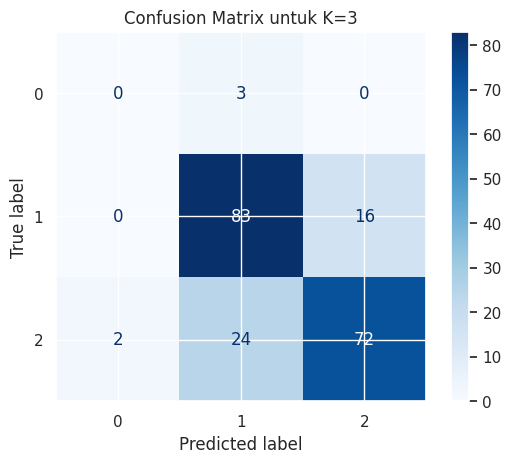

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)  # Sesuaikan y_pred_k3 dengan model
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix untuk K=3')
plt.show()


In [ ]:
testing = {
    'rank': [3],              # Rank pemain (contoh: diwakili angka setelah encoding)
    'agent': [4],             # Agen yang digunakan (contoh: Cypher -> 4 setelah encoding)
    'map': [2],               # Map tempat bermain (contoh: Ascent -> 2 setelah encoding)
    'kills': [20],            # Jumlah kill
    'deaths': [8],            # Jumlah death
    'assists': [5],           # Jumlah assist
    'kdr': [2.5],             # Kill-Death Ratio
    'num_frag': [3]           # Jumlah frag
}
testing= pd.DataFrame(testing)
testing


rank  agent  map  kills  deaths  assists  kdr  num_frag
0     3      4    2     20       8        5  2.5         3

In [ ]:
pred_coba = knn.predict(testing)
print("Hasil Prediksi dari Match Baru")
print(pred_coba)

Hasil Prediksi dari Match Baru
[2]


# **K=5**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

knn = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred,zero_division=0))
print('Akurasi KNN : {:.2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.73      0.86      0.79        99
           2       0.83      0.71      0.77        98

    accuracy                           0.78       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.77      0.78      0.77       200

Akurasi KNN : 77.50%


In [ ]:
# Prediksi pada data training
y_train_pred = knn.predict(x_train)  # Prediksi menggunakan data training
KNN_train_acc = accuracy_score(y_train, y_train_pred)  # Akurasi pada data training

# Print hasil akurasi
print("Akurasi KNN pada Data Training : {:.2f}%".format(KNN_train_acc * 100))

# Laporan klasifikasi untuk data training
print("\nLaporan Klasifikasi (Data Training):")
print(classification_report(y_train, y_train_pred, zero_division=0))


Akurasi KNN pada Data Training : 84.38%

Laporan Klasifikasi (Data Training):
              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.80      0.92      0.85       398
           2       0.90      0.78      0.84       393

    accuracy                           0.84       800
   macro avg       0.90      0.64      0.69       800
weighted avg       0.85      0.84      0.84       800



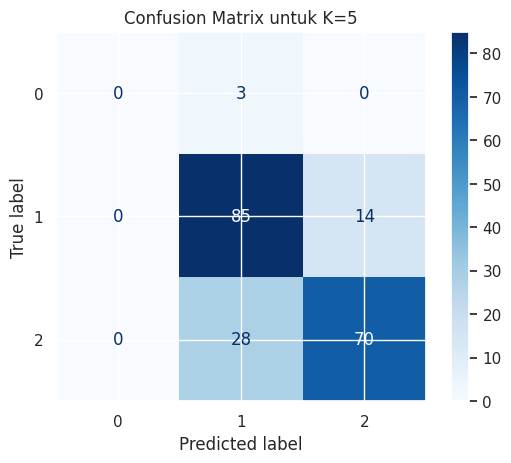

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix untuk K=5')
plt.show()

In [ ]:
testing = {
    'rank': [3],              # Rank pemain (contoh: diwakili angka setelah encoding)
    'agent': [4],             # Agen yang digunakan (contoh: Cypher -> 4 setelah encoding)
    'map': [2],               # Map tempat bermain (contoh: Ascent -> 2 setelah encoding)
    'kills': [20],            # Jumlah kill
    'deaths': [8],            # Jumlah death
    'assists': [5],           # Jumlah assist
    'kdr': [2.5],             # Kill-Death Ratio
    'num_frag': [3]           # Jumlah frag
}
testing= pd.DataFrame(testing)
testing



rank  agent  map  kills  deaths  assists  kdr  num_frag
0     3      4    2     20       8        5  2.5         3

In [ ]:
pred_coba = knn.predict(testing)
print("Hasil Prediksi dari Match Baru")
print(pred_coba)

Hasil Prediksi dari Match Baru
[2]


# **K=7**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

knn = KNeighborsClassifier(n_neighbors=7,metric='manhattan')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred,zero_division=0))
print('Akurasi KNN : {:.2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.71      0.85      0.77        99
           2       0.80      0.67      0.73        98

    accuracy                           0.75       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.75      0.75      0.74       200

Akurasi KNN : 75.00%


In [ ]:
# Prediksi pada data training
y_train_pred = knn.predict(x_train)  # Prediksi menggunakan data training
KNN_train_acc = accuracy_score(y_train, y_train_pred)  # Akurasi pada data training

# Print hasil akurasi
print("Akurasi KNN pada Data Training : {:.2f}%".format(KNN_train_acc * 100))

# Laporan klasifikasi untuk data training
print("\nLaporan Klasifikasi (Data Training):")
print(classification_report(y_train, y_train_pred, zero_division=0))




Akurasi KNN pada Data Training : 82.62%

Laporan Klasifikasi (Data Training):
              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.78      0.91      0.84       398
           2       0.89      0.76      0.82       393

    accuracy                           0.83       800
   macro avg       0.89      0.59      0.62       800
weighted avg       0.84      0.83      0.82       800



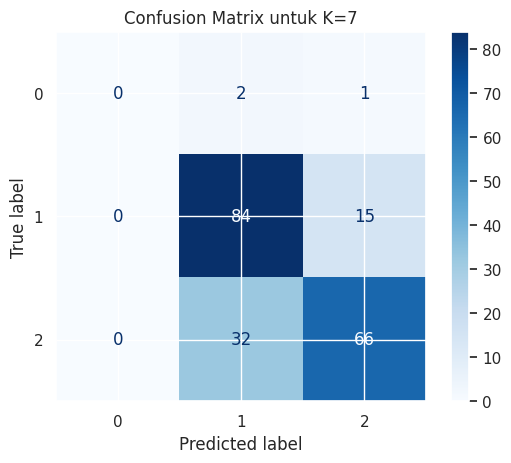

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix untuk K=7')
plt.show()

In [ ]:
testing = {
    'rank': [3],              # Rank pemain (contoh: diwakili angka setelah encoding)
    'agent': [4],             # Agen yang digunakan (contoh: Cypher -> 4 setelah encoding)
    'map': [2],               # Map tempat bermain (contoh: Ascent -> 2 setelah encoding)
    'kills': [20],            # Jumlah kill
    'deaths': [8],            # Jumlah death
    'assists': [5],           # Jumlah assist
    'kdr': [2.5],             # Kill-Death Ratio
    'num_frag': [3]           # Jumlah frag
}
testing= pd.DataFrame(testing)
testing




rank  agent  map  kills  deaths  assists  kdr  num_frag
0     3      4    2     20       8        5  2.5         3

In [ ]:
pred_coba = knn.predict(testing)
print("Hasil Prediksi dari Match Baru")
print(pred_coba)

Hasil Prediksi dari Match Baru
[2]


# **EVALUASI (80% Training, 20% Testing)**

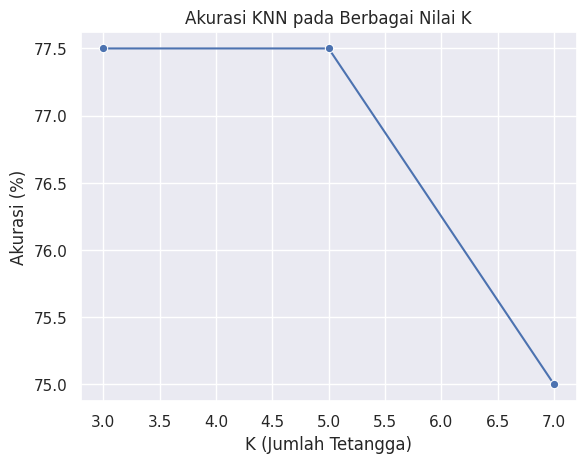

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# ... (Your previous code for data loading, preprocessing, etc.) ...

# Define a function to train and evaluate the KNN model for a given K
def train_and_evaluate_knn(k, x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy * 100  # Multiply by 100 to get percentage

# Assuming you have x_train, y_train, x_test, y_test from your train_test_split

# Calculate accuracy for different values of K (in percentage)
acc_k3 = train_and_evaluate_knn(3, x_train, y_train, x_test, y_test)
acc_k5 = train_and_evaluate_knn(5, x_train, y_train, x_test, y_test)
acc_k7 = train_and_evaluate_knn(7, x_train, y_train, x_test, y_test)

# Create the results dictionary and DataFrame
results = {'K': [3, 5, 7], 'Accuracy': [acc_k3, acc_k5, acc_k7]}
results_df = pd.DataFrame(results)

# ... (Rest of your code for plotting the results) ...

sns.lineplot(x='K', y='Accuracy', data=results_df, marker='o')
plt.title('Akurasi KNN pada Berbagai Nilai K')
plt.xlabel('K (Jumlah Tetangga)')
plt.ylabel('Akurasi (%)')  # Change y-axis label to "Akurasi (%)"
plt.show()

# **(50% Training, 50% Testing):**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42,stratify=y)

In [ ]:
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_test : {y_test.shape}")

x_train : (500, 8)
y_train : (500,)
x_test : (500, 8)
y_test : (500,)


# **Modeling**

# **K=3**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

knn = KNeighborsClassifier(n_neighbors=3,metric='manhattan')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Akurasi KNN : {:.2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.73      0.82      0.78       249
           2       0.80      0.71      0.75       245

    accuracy                           0.76       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.76      0.76      0.76       500

Akurasi KNN : 75.80%


In [ ]:
# Prediksi pada data training
y_train_pred = knn.predict(x_train)  # Prediksi menggunakan data training
KNN_train_acc = accuracy_score(y_train, y_train_pred)  # Akurasi pada data training

# Print hasil akurasi
print("Akurasi KNN pada Data Training : {:.2f}%".format(KNN_train_acc * 100))

# Laporan klasifikasi untuk data training
print("\nLaporan Klasifikasi (Data Training):")
print(classification_report(y_train, y_train_pred, zero_division=0))


Akurasi KNN pada Data Training : 84.60%

Laporan Klasifikasi (Data Training):
              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.83      0.88      0.85       248
           2       0.88      0.82      0.85       246

    accuracy                           0.85       500
   macro avg       0.72      0.79      0.74       500
weighted avg       0.85      0.85      0.85       500



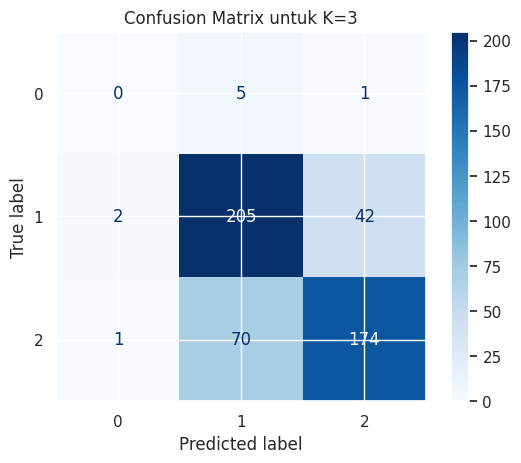

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)  # Sesuaikan y_pred_k3 dengan model
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix untuk K=3')
plt.show()

In [ ]:
testing = {
    'rank': [3],              # Rank pemain (contoh: diwakili angka setelah encoding)
    'agent': [4],             # Agen yang digunakan (contoh: Cypher -> 4 setelah encoding)
    'map': [2],               # Map tempat bermain (contoh: Ascent -> 2 setelah encoding)
    'kills': [20],            # Jumlah kill
    'deaths': [8],            # Jumlah death
    'assists': [5],           # Jumlah assist
    'kdr': [2.5],             # Kill-Death Ratio
    'num_frag': [3]           # Jumlah frag
}
testing= pd.DataFrame(testing)
testing


rank  agent  map  kills  deaths  assists  kdr  num_frag
0     3      4    2     20       8        5  2.5         3

In [ ]:
pred_coba = knn.predict(testing)
print("Hasil Prediksi dari Match Baru")
print(pred_coba)

Hasil Prediksi dari Match Baru
[2]


# **K=5**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

knn = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred, zero_division=0))
print('Akurasi KNN : {:.2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.72      0.84      0.78       249
           2       0.81      0.70      0.75       245

    accuracy                           0.76       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.76      0.76      0.75       500

Akurasi KNN : 75.80%


In [ ]:
# Prediksi pada data training
y_train_pred = knn.predict(x_train)  # Prediksi menggunakan data training
KNN_train_acc = accuracy_score(y_train, y_train_pred)  # Akurasi pada data training

# Print hasil akurasi
print("Akurasi KNN pada Data Training : {:.2f}%".format(KNN_train_acc * 100))

# Laporan klasifikasi untuk data training
print("\nLaporan Klasifikasi (Data Training):")
print(classification_report(y_train, y_train_pred, zero_division=0))


Akurasi KNN pada Data Training : 84.20%

Laporan Klasifikasi (Data Training):
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.81      0.90      0.85       248
           2       0.88      0.80      0.84       246

    accuracy                           0.84       500
   macro avg       0.90      0.62      0.66       500
weighted avg       0.85      0.84      0.84       500



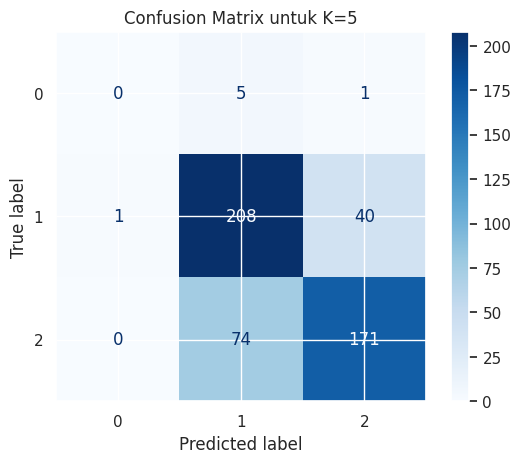

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)  # Sesuaikan y_pred_k3 dengan model
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix untuk K=5')
plt.show()

In [ ]:
testing = {
    'rank': [3],              # Rank pemain (contoh: diwakili angka setelah encoding)
    'agent': [4],             # Agen yang digunakan (contoh: Cypher -> 4 setelah encoding)
    'map': [2],               # Map tempat bermain (contoh: Ascent -> 2 setelah encoding)
    'kills': [20],            # Jumlah kill
    'deaths': [8],            # Jumlah death
    'assists': [5],           # Jumlah assist
    'kdr': [2.5],             # Kill-Death Ratio
    'num_frag': [3]           # Jumlah frag
}
testing= pd.DataFrame(testing)
testing


rank  agent  map  kills  deaths  assists  kdr  num_frag
0     3      4    2     20       8        5  2.5         3

In [ ]:
pred_coba = knn.predict(testing)
print("Hasil Prediksi dari Match Baru")
print(pred_coba)

Hasil Prediksi dari Match Baru
[2]


# **K=7**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

knn = KNeighborsClassifier(n_neighbors=7,metric='manhattan')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred,  zero_division=0))
print('Akurasi KNN : {:.2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.72      0.86      0.78       249
           2       0.82      0.68      0.75       245

    accuracy                           0.76       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.76      0.76      0.75       500

Akurasi KNN : 76.00%


In [ ]:
# Prediksi pada data training
y_train_pred = knn.predict(x_train)  # Prediksi menggunakan data training
KNN_train_acc = accuracy_score(y_train, y_train_pred)  # Akurasi pada data training

# Print hasil akurasi
print("Akurasi KNN pada Data Training : {:.2f}%".format(KNN_train_acc * 100))

# Laporan klasifikasi untuk data training
print("\nLaporan Klasifikasi (Data Training):")
print(classification_report(y_train, y_train_pred, zero_division=0))


Akurasi KNN pada Data Training : 82.40%

Laporan Klasifikasi (Data Training):
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.80      0.87      0.84       248
           2       0.85      0.79      0.82       246

    accuracy                           0.82       500
   macro avg       0.88      0.61      0.65       500
weighted avg       0.83      0.82      0.82       500



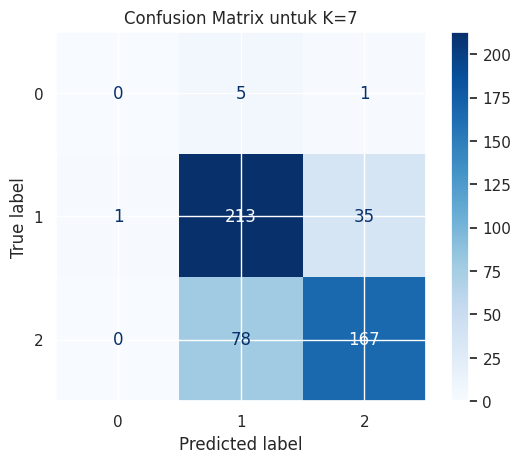

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)  # Sesuaikan y_pred_k3 dengan model
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix untuk K=7')
plt.show()

In [ ]:
testing = {
    'rank': [3],              # Rank pemain (contoh: diwakili angka setelah encoding)
    'agent': [4],             # Agen yang digunakan (contoh: Cypher -> 4 setelah encoding)
    'map': [2],               # Map tempat bermain (contoh: Ascent -> 2 setelah encoding)
    'kills': [20],            # Jumlah kill
    'deaths': [8],            # Jumlah death
    'assists': [5],           # Jumlah assist
    'kdr': [2.5],             # Kill-Death Ratio
    'num_frag': [3]           # Jumlah frag
}
testing= pd.DataFrame(testing)
testing


rank  agent  map  kills  deaths  assists  kdr  num_frag
0     3      4    2     20       8        5  2.5         3

In [ ]:
pred_coba = knn.predict(testing)
print("Hasil Prediksi dari Match Baru")
print(pred_coba)

Hasil Prediksi dari Match Baru
[2]


# **EVALUASI (50% Training, 50% Testing)**

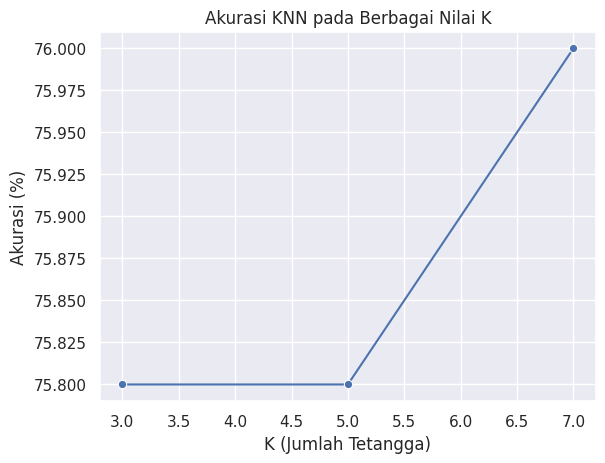

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# ... (Your previous code for data loading, preprocessing, etc.) ...

# Define a function to train and evaluate the KNN model for a given K
def train_and_evaluate_knn(k, x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy * 100  # Multiply by 100 to get percentage

# Assuming you have x_train, y_train, x_test, y_test from your train_test_split

# Calculate accuracy for different values of K (in percentage)
acc_k3 = train_and_evaluate_knn(3, x_train, y_train, x_test, y_test)
acc_k5 = train_and_evaluate_knn(5, x_train, y_train, x_test, y_test)
acc_k7 = train_and_evaluate_knn(7, x_train, y_train, x_test, y_test)

# Create the results dictionary and DataFrame
results = {'K': [3, 5, 7], 'Accuracy': [acc_k3, acc_k5, acc_k7]}
results_df = pd.DataFrame(results)

# ... (Rest of your code for plotting the results) ...

sns.lineplot(x='K', y='Accuracy', data=results_df, marker='o')
plt.title('Akurasi KNN pada Berbagai Nilai K')
plt.xlabel('K (Jumlah Tetangga)')
plt.ylabel('Akurasi (%)')  # Change y-axis label to "Akurasi (%)"
plt.show()